# Order of Project Milestones:
• Project Milestone 2  
• Project Milestone 1  
• Project Milestone 3  

# Project Milestone 2

#### Mortgage Interest Rates Dataset

In [1]:
# Loading required libraries
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading the html
url="https://www.nerdwallet.com/article/mortgages/current-interest-rates"
page = requests.get(url).text
soup = BeautifulSoup(page, 'lxml')

In [3]:
# Finding the table
table = soup.find('table', {'class':'_1B1L1C'})

In [4]:
# Load the headers into a list
headers = []
for i in table.find_all('th'):
    title = i.text.strip()
    headers.append(title)
headers

['Date',
 'Average 30-year fixed APR',
 'Average 15-year fixed APR',
 'Average 5 year ARM APR']

In [5]:
# Made a dataframe with the headers
interest_rates_df = pd.DataFrame(columns = headers)
interest_rates_df

,Date,Average 30-year fixed APR,Average 15-year fixed APR,Average 5 year ARM APR


In [6]:
# Finding all the rows of data and loading it into the dataframe
for row in table.find_all('tr')[1:]:
    data = row.find_all('td')
    row_data = [td.text.strip() for td in data]
    length = len(interest_rates_df)
    interest_rates_df.loc[length] = row_data

In [7]:
interest_rates_df

,Date,Average 30-year fixed APR,Average 15-year fixed APR,Average 5 year ARM APR
0,"June 2, 2022",5.236%,4.437%,4.184%
1,"June 1, 2022",5.194%,4.479%,4.203%
2,"May 31, 2022",5.700%,4.899%,4.094%
3,"May 25, 2022",5.023%,4.301%,3.785%
4,"May 24, 2022",5.335%,4.567%,3.77%
...,...,...,...,...
574,"Jan. 24, 2020",3.8%,3.39%,4.09%
575,"Jan. 23, 2020",3.85%,3.41%,4.11%
576,"Jan. 22, 2020",3.85%,3.41%,4.13%
577,"Jan. 21, 2020",3.85%,3.42%,4.14%


In [8]:
# Converting the Date datatype so it can be the same type with the Date columns in the other datasets. 
interest_rates_df['Date'] = pd.to_datetime(interest_rates_df['Date'])
interest_rates_df

,Date,Average 30-year fixed APR,Average 15-year fixed APR,Average 5 year ARM APR
0,2022-06-02,5.236%,4.437%,4.184%
1,2022-06-01,5.194%,4.479%,4.203%
2,2022-05-31,5.700%,4.899%,4.094%
3,2022-05-25,5.023%,4.301%,3.785%
4,2022-05-24,5.335%,4.567%,3.77%
...,...,...,...,...
574,2020-01-24,3.8%,3.39%,4.09%
575,2020-01-23,3.85%,3.41%,4.11%
576,2020-01-22,3.85%,3.41%,4.13%
577,2020-01-21,3.85%,3.42%,4.14%


In [9]:
# Reversing the order of rows in the dataframe to match the other two dataframes
interest_rates_df = interest_rates_df[::-1]
interest_rates_df

,Date,Average 30-year fixed APR,Average 15-year fixed APR,Average 5 year ARM APR
578,2020-01-17,3.89%,3.45%,4.16%
577,2020-01-21,3.85%,3.42%,4.14%
576,2020-01-22,3.85%,3.41%,4.13%
575,2020-01-23,3.85%,3.41%,4.11%
574,2020-01-24,3.8%,3.39%,4.09%
...,...,...,...,...
4,2022-05-24,5.335%,4.567%,3.77%
3,2022-05-25,5.023%,4.301%,3.785%
2,2022-05-31,5.700%,4.899%,4.094%
1,2022-06-01,5.194%,4.479%,4.203%


In [10]:
# Changing column names to simpler column names. The initial column names are too long. Also will add "rate" infront of it 
# to distinguish these columns from other columns in the other datasets
interest_rates_df.rename(columns={'Average 30-year fixed APR': 'rate_30yr(%)', 'Average 15-year fixed APR':'rate_15yr(%)', 
                                  'Average 5 year ARM APR':'rate_5yr(%)'}, inplace=True)
interest_rates_df.head()

,Date,rate_30yr(%),rate_15yr(%),rate_5yr(%)
578,2020-01-17,3.89%,3.45%,4.16%
577,2020-01-21,3.85%,3.42%,4.14%
576,2020-01-22,3.85%,3.41%,4.13%
575,2020-01-23,3.85%,3.41%,4.11%
574,2020-01-24,3.8%,3.39%,4.09%


In [11]:
# Removing the % sign from all the columns that include it. Some rows have %. instead, so removing that as well.
interest_rates_df['rate_30yr(%)'] = interest_rates_df['rate_30yr(%)'].str.rstrip('%')
interest_rates_df['rate_30yr(%)'] = interest_rates_df['rate_30yr(%)'].str.rstrip('%.')
interest_rates_df['rate_15yr(%)'] = interest_rates_df['rate_15yr(%)'].str.rstrip('%')
interest_rates_df['rate_15yr(%)'] = interest_rates_df['rate_15yr(%)'].str.rstrip('%.')
interest_rates_df['rate_5yr(%)'] = interest_rates_df['rate_5yr(%)'].str.rstrip('%')
interest_rates_df['rate_5yr(%)'] = interest_rates_df['rate_5yr(%)'].str.rstrip('%.')
interest_rates_df.head()

,Date,rate_30yr(%),rate_15yr(%),rate_5yr(%)
578,2020-01-17,3.89,3.45,4.16
577,2020-01-21,3.85,3.42,4.14
576,2020-01-22,3.85,3.41,4.13
575,2020-01-23,3.85,3.41,4.11
574,2020-01-24,3.8,3.39,4.09


In [12]:
# Converting the types of the data in the columns from object to float. This will make it easier for analysis.
interest_rates_df['rate_30yr(%)'] = interest_rates_df['rate_30yr(%)'].astype(float)
interest_rates_df['rate_15yr(%)'] = interest_rates_df['rate_15yr(%)'].astype(float)
interest_rates_df['rate_5yr(%)'] = interest_rates_df['rate_5yr(%)'].astype(float)
interest_rates_df.dtypes

Date            datetime64[ns]
rate_30yr(%)           float64
rate_15yr(%)           float64
rate_5yr(%)            float64
dtype: object

#### Cryptocurrency (Bitcoin) Prices Dataset

In [13]:
# Using the read_csv() function from the pandas library, I loaded the data set into a dataframe.
btc_df = pd.read_csv('BTC-USD.csv')
btc_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-01,7571.616211,7571.616211,7291.341797,7424.292480,7424.292480,18720708479
1,2019-12-02,7424.036133,7474.818848,7233.399414,7321.988281,7321.988281,17082040706
2,2019-12-03,7323.975586,7418.858887,7229.356934,7320.145508,7320.145508,14797485769
3,2019-12-04,7320.125000,7539.784668,7170.922852,7252.034668,7252.034668,21664240918
4,2019-12-05,7253.241699,7743.431641,7232.676758,7448.307617,7448.307617,18816085231
...,...,...,...,...,...,...,...
866,2022-04-15,39939.402344,40617.722656,39866.832031,40553.464844,40553.464844,21756855753
867,2022-04-16,40552.316406,40633.679688,40078.425781,40424.484375,40424.484375,16833150693
868,2022-04-17,40417.777344,40570.726563,39620.894531,39716.953125,39716.953125,19087633042
869,2022-04-18,39721.203125,40986.320313,38696.191406,40826.214844,40826.214844,33705182072


In [14]:
# Converting the Date datatype so it can be the same type with the Date columns in the other datasets. 
btc_df['Date'] = pd.to_datetime(btc_df['Date'])
btc_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-01,7571.616211,7571.616211,7291.341797,7424.292480,7424.292480,18720708479
1,2019-12-02,7424.036133,7474.818848,7233.399414,7321.988281,7321.988281,17082040706
2,2019-12-03,7323.975586,7418.858887,7229.356934,7320.145508,7320.145508,14797485769
3,2019-12-04,7320.125000,7539.784668,7170.922852,7252.034668,7252.034668,21664240918
4,2019-12-05,7253.241699,7743.431641,7232.676758,7448.307617,7448.307617,18816085231
...,...,...,...,...,...,...,...
866,2022-04-15,39939.402344,40617.722656,39866.832031,40553.464844,40553.464844,21756855753
867,2022-04-16,40552.316406,40633.679688,40078.425781,40424.484375,40424.484375,16833150693
868,2022-04-17,40417.777344,40570.726563,39620.894531,39716.953125,39716.953125,19087633042
869,2022-04-18,39721.203125,40986.320313,38696.191406,40826.214844,40826.214844,33705182072


In [15]:
# Adding a column where if there was an increase or not. If the close price is more than the open price then there is an 
# an increase and it will be a 1 otherwise it will be a 0
btc_df['Increase_Decrease'] = np.where((btc_df['Close'] - btc_df['Open'])>0, 1, 0)

In [16]:
btc_df

,Date,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease
0,2019-12-01,7571.616211,7571.616211,7291.341797,7424.292480,7424.292480,18720708479,0
1,2019-12-02,7424.036133,7474.818848,7233.399414,7321.988281,7321.988281,17082040706,0
2,2019-12-03,7323.975586,7418.858887,7229.356934,7320.145508,7320.145508,14797485769,0
3,2019-12-04,7320.125000,7539.784668,7170.922852,7252.034668,7252.034668,21664240918,0
4,2019-12-05,7253.241699,7743.431641,7232.676758,7448.307617,7448.307617,18816085231,1
...,...,...,...,...,...,...,...,...
866,2022-04-15,39939.402344,40617.722656,39866.832031,40553.464844,40553.464844,21756855753,1
867,2022-04-16,40552.316406,40633.679688,40078.425781,40424.484375,40424.484375,16833150693,0
868,2022-04-17,40417.777344,40570.726563,39620.894531,39716.953125,39716.953125,19087633042,0
869,2022-04-18,39721.203125,40986.320313,38696.191406,40826.214844,40826.214844,33705182072,1


#### Covid-19 Dataset

In [17]:
# Using the read_csv() function from the pandas library, I loaded the data set into a dataframe.
covid_df = pd.read_csv('owid-covid-data.csv')
covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180288,ZWE,Africa,Zimbabwe,2022-04-15,247237.0,29.0,44.571,5462.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
180289,ZWE,Africa,Zimbabwe,2022-04-16,247237.0,0.0,44.571,5462.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
180290,ZWE,Africa,Zimbabwe,2022-04-17,247278.0,41.0,45.714,5463.0,1.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
180291,ZWE,Africa,Zimbabwe,2022-04-18,247297.0,19.0,41.000,5464.0,1.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [18]:
# Only using rows with location as United States. This is because the other two datasets are based on the United States.
covid_df = covid_df[covid_df['location'] == 'United States']
covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
169852,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
169853,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
169854,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
169855,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
169856,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,-8926.0,-3.59,-2.63,-26.811643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170666,USA,North America,United States,2022-04-15,80613695.0,37474.0,32224.143,988581.0,460.0,447.000,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
170667,USA,North America,United States,2022-04-16,80626134.0,12439.0,32206.429,988632.0,51.0,434.571,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
170668,USA,North America,United States,2022-04-17,80633315.0,7181.0,31979.286,988641.0,9.0,433.857,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
170669,USA,North America,United States,2022-04-18,80686311.0,52996.0,33656.429,988899.0,258.0,424.714,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN


In [19]:
# I removed columns I am pretty sure I won't be using. The columns that I kept I am not sure about using all those columns 
# either, but I have included them just incase.
covid_df = covid_df[['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'reproduction_rate', 'icu_patients', 
                     'hosp_patients', 'total_tests', 'new_tests', 'positive_rate', 'total_vaccinations']]
covid_df

,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,total_tests,new_tests,positive_rate,total_vaccinations
169852,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169853,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169854,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169855,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169856,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
170666,2022-04-15,80613695.0,37474.0,988581.0,460.0,0.94,1536.0,10241.0,NaN,NaN,NaN,569842436.0
170667,2022-04-16,80626134.0,12439.0,988632.0,51.0,NaN,1470.0,9901.0,NaN,NaN,NaN,570053945.0
170668,2022-04-17,80633315.0,7181.0,988641.0,9.0,NaN,1436.0,10014.0,NaN,NaN,NaN,570079026.0
170669,2022-04-18,80686311.0,52996.0,988899.0,258.0,NaN,NaN,NaN,NaN,NaN,NaN,570111773.0


In [20]:
# I am renaming the columns. The date column will be 'Date' because the other datasets will have the same and I will be 
# merging the datasets on that column. For the other columns I will be adding 'covid' in front of all of them so when I merge 
# the datasets I can easily see which columns belonged to which dataset.
covid_df.rename(columns={'date': 'Date', 'total_cases':'covid_total_cases', 'new_cases':'covid_new_cases', 
                         'total_deaths':'covid_total_deaths', 'new_deaths':'covid_new_deaths', 
                         'reproduction_rate':'covid_reproduction_rate', 'icu_patients':'covid_icu_patients', 
                         'hosp_patients':'covid_hosp_patients', 'total_tests':'covid_total_tests', 
                         'new_tests':'covid_new_tests', 'positive_rate':'covid_positive_rate', 
                         'total_vaccinations':'covid_total_vaccinations'}, inplace=True)
covid_df.head()

C:\Users\jahed\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Date,covid_total_cases,covid_new_cases,covid_total_deaths,covid_new_deaths,covid_reproduction_rate,covid_icu_patients,covid_hosp_patients,covid_total_tests,covid_new_tests,covid_positive_rate,covid_total_vaccinations
169852,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169853,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169854,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169855,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169856,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Changing the type of the Date column so it can be the same type with the Date columns in the other datasets.
covid_df['Date'] = pd.to_datetime(covid_df['Date'])
covid_df

C:\Users\jahed\AppData\Local\Temp/ipykernel_7172/1911943865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df['Date'] = pd.to_datetime(covid_df['Date'])


,Date,covid_total_cases,covid_new_cases,covid_total_deaths,covid_new_deaths,covid_reproduction_rate,covid_icu_patients,covid_hosp_patients,covid_total_tests,covid_new_tests,covid_positive_rate,covid_total_vaccinations
169852,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169853,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169854,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169855,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169856,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
170666,2022-04-15,80613695.0,37474.0,988581.0,460.0,0.94,1536.0,10241.0,NaN,NaN,NaN,569842436.0
170667,2022-04-16,80626134.0,12439.0,988632.0,51.0,NaN,1470.0,9901.0,NaN,NaN,NaN,570053945.0
170668,2022-04-17,80633315.0,7181.0,988641.0,9.0,NaN,1436.0,10014.0,NaN,NaN,NaN,570079026.0
170669,2022-04-18,80686311.0,52996.0,988899.0,258.0,NaN,NaN,NaN,NaN,NaN,NaN,570111773.0


#### Merging the three datasets

In [22]:
semi_merged_data = pd.merge(interest_rates_df, btc_df, how='inner', on='Date')

In [23]:
semi_merged_data

,Date,rate_30yr(%),rate_15yr(%),rate_5yr(%),Open,High,Low,Close,Adj Close,Volume,Increase_Decrease
0,2020-01-17,3.890,3.450,4.160,8725.209961,8958.122070,8677.316406,8929.038086,8929.038086,36372139320,1
1,2020-01-21,3.850,3.420,4.140,8658.991211,8755.706055,8544.520508,8745.894531,8745.894531,24097418512,1
2,2020-01-22,3.850,3.410,4.130,8744.210938,8792.994141,8636.747070,8680.875977,8680.875977,22600204051,0
3,2020-01-23,3.850,3.410,4.110,8680.650391,8687.747070,8333.637695,8406.515625,8406.515625,25770680779,0
4,2020-01-24,3.800,3.390,4.090,8405.567383,8514.666992,8266.840820,8445.434570,8445.434570,24397913026,1
...,...,...,...,...,...,...,...,...,...,...,...
545,2022-04-11,5.093,4.135,3.604,42201.039063,42424.589844,39373.058594,39521.902344,39521.902344,33949912166,0
546,2022-04-12,5.150,4.224,3.479,39533.714844,40617.585938,39388.328125,40127.183594,40127.183594,30991500854,1
547,2022-04-13,5.074,4.268,3.504,40123.570313,41430.054688,39712.746094,41166.730469,41166.730469,27691105228,1
548,2022-04-18,5.168,4.332,3.447,39721.203125,40986.320313,38696.191406,40826.214844,40826.214844,33705182072,1


In [24]:
full_merged_data = pd.merge(semi_merged_data, covid_df, how='inner', on='Date')

In [25]:
full_merged_data

,Date,rate_30yr(%),rate_15yr(%),rate_5yr(%),Open,High,Low,Close,Adj Close,Volume,...,covid_new_cases,covid_total_deaths,covid_new_deaths,covid_reproduction_rate,covid_icu_patients,covid_hosp_patients,covid_total_tests,covid_new_tests,covid_positive_rate,covid_total_vaccinations
0,2020-01-22,3.850,3.410,4.130,8744.210938,8792.994141,8636.747070,8680.875977,8680.875977,22600204051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,3.850,3.410,4.110,8680.650391,8687.747070,8333.637695,8406.515625,8406.515625,25770680779,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,3.800,3.390,4.090,8405.567383,8514.666992,8266.840820,8445.434570,8445.434570,24397913026,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-27,3.770,3.390,4.140,8597.308594,8977.726563,8597.308594,8909.819336,8909.819336,28647338393,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-28,3.790,3.400,4.080,8912.524414,9358.589844,8908.447266,9358.589844,9358.589844,34398744403,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,2022-04-11,5.093,4.135,3.604,42201.039063,42424.589844,39373.058594,39521.902344,39521.902344,33949912166,...,41256.0,985926.0,322.0,1.08,1569.0,10095.0,859317707.0,554680.0,0.038,567799917.0
544,2022-04-12,5.150,4.224,3.479,39533.714844,40617.585938,39388.328125,40127.183594,40127.183594,30991500854,...,35736.0,986487.0,561.0,1.04,1528.0,10105.0,860024452.0,706745.0,0.041,568349863.0
545,2022-04-13,5.074,4.268,3.504,40123.570313,41430.054688,39712.746094,41166.730469,41166.730469,27691105228,...,41135.0,987443.0,956.0,1.02,1524.0,10133.0,NaN,NaN,NaN,568861423.0
546,2022-04-18,5.168,4.332,3.447,39721.203125,40986.320313,38696.191406,40826.214844,40826.214844,33705182072,...,52996.0,988899.0,258.0,NaN,NaN,NaN,NaN,NaN,NaN,570111773.0


# Project Milestone 1

For my term project I want to look at the relationships between mortgage interest rates, cryptocurrency prices, and Covid-19 rates. During 2020 to 2021, we noticed some big differences in the mortgage interest  rates and cryptocurrency prices. It was observed that mortgage interest rates were lower. In addition, cryptocurrency prices were at an all time high. It seems like the pandemic had some sort of effect on the mortgage interest rates and cryptocurrency prices. By finding a relationship between the three, it will help many people and organizations that invest into properties and cryptocurrencies. If a pandemic similar to Covid-19 happens again, these investors will be more prepared and confident when investing into properties and cryptocurrencies.  
The Covid-19 data I will be using will be imported from a covid data CSV file. The cryptocurrency data I will be using will be imported from a Bitcoin CSV file. The mortgage interest rates data I will be using will be imported from a website that has the data in a table. The links that the data will come from will be below. After importing the datasets, I will have to clean them. The Covid-19 dataset will need to be cleaned the most because it has data from multiple countries. The other two datasets are based on the United States, so I would have to remove the other countries from the covid dataset and only keep data on the United States. The three datasets have one thing in common, dates. Each shows multiple daily records. I will use the dates to connect all the datasets together. By doing this, finding the relationships between mortgage interest rates, cryptocurrency prices, and Covid-19 rates will be easier.

#### Graphical Analysis

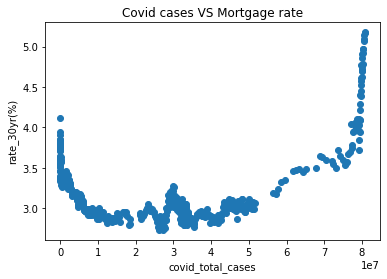

In [26]:
plt.scatter(full_merged_data['covid_total_cases'], full_merged_data['rate_30yr(%)'])
plt.title('Covid cases VS Mortgage rate')
plt.xlabel('covid_total_cases')
plt.ylabel('rate_30yr(%)')
plt.show()

By looking at this graph we can observe that when covid-cases were around 10 million to 50 million, mortgage rates were very low. However, it started rising after 60 million cases. Also, most of the points are plotted between these values, so it was probably the time when the virus was spreading the most.

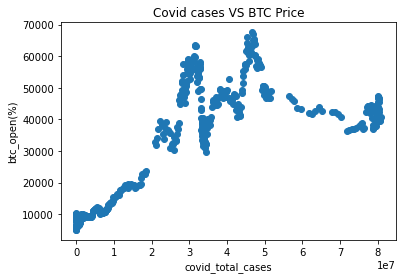

In [27]:
plt.scatter(full_merged_data['covid_total_cases'], full_merged_data['Open'])
plt.title('Covid cases VS BTC Price')
plt.xlabel('covid_total_cases')
plt.ylabel('btc_open(%)')
plt.show()

By looking at this graph we can observe that when covid cases were around 30 million to 50 million, Bitcoin reached high prices. However, the price fell after 50 million cases. Similar to the last graph, most of the points are plotted between these values, so it was probably the time when the virus was spreading the most.

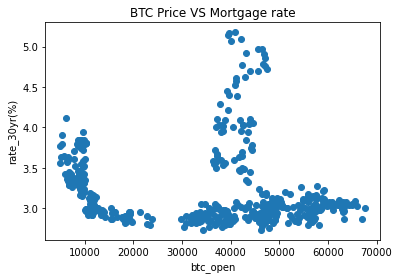

In [28]:
plt.scatter(full_merged_data['Open'], full_merged_data['rate_30yr(%)'])
plt.title('BTC Price VS Mortgage rate')
plt.xlabel('btc_open')
plt.ylabel('rate_30yr(%)')
plt.show()

In this graph most of the points are between the prices of 30,000 and 70,000. Also, the mortgage rate was around 3%. This could mean that at the time when many people were buying Bitcoin, mortgage rates were lower.

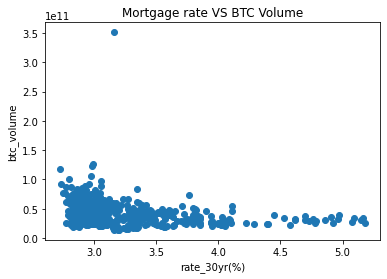

In [29]:
plt.scatter(full_merged_data['rate_30yr(%)'], full_merged_data['Volume'])
plt.title('Mortgage rate VS BTC Volume')
plt.xlabel('rate_30yr(%)')
plt.ylabel('btc_volume')
plt.show()

This graph can help explain the previous graph better. It looks like when there was a higher volume of Bitcoin, mortgage rates were low. As the volume decreased mortgage rates increased.

#### Conclusion

By looking at the graphs I can see where most of the points in each graph are more closely packed together. This helps explain the graphs and variables more. When covid was spreading the most, mortgage rates went down, and the price of Bitcoin went up. When the spread started slowing down mortgage rates were going back up, and the price of Bitcoin started going down. 

# Project Milestone 3

In [30]:
full_merged_data = full_merged_data.dropna()

In [31]:
# Split the data into a training and test set.
from sklearn.model_selection import train_test_split

X = full_merged_data.drop(columns=['Increase_Decrease', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
y = full_merged_data.Increase_Decrease

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [32]:
# Train a logistic regression using the training data.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

#Create logistic regression object
logit = LogisticRegression(random_state=1)

In [33]:
# Train model
logit.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [34]:
# Finding the accuracy score, R2 score, and RMSE score
pred = logit.predict(X_test)
print('accuracy:', accuracy_score(y_test, pred))
matrix = confusion_matrix(y_test, pred)
matrix

accuracy: 0.6875


array([[14,  4],
       [ 6,  8]], dtype=int64)

Since, I added a column that tells us if the price increased or decreased, I have to make an adjustment to the problem that I am trying to solve. The new problem will be to try and predict whether or not the closing price of Bitcoin will be greater than the opening price by observing and comparing the mortgage interest rates and Covid-19 data. I decided to use a logistic regression model. This is because my target variable is a binary dependent variable. In addition, I had better results for the evaluation metrics with a logistic regression model compared to other models. The accuracy score is 0.6875. This is a decent accuracy for the prediction. Since there may be other factors that can affect the price of Bitcoin, other than Covid-19 and the mortgage rate, the accuracy isn't as high as I was hoping. One example of another factor is the cryptocurrency crash on May 2021. 